##### 1 data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import PredefinedSplit, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [17]:
train = pd.read_csv("/Users/Zjxi/Desktop/IntroToML_Proj/train.csv")
train = train.fillna('0')

validation = pd.read_csv("/Users/Zjxi/Desktop/IntroToML_Proj/validation.csv")

train = pd.concat([train, validation], ignore_index=True)

# drop 'State' variable
train = train.drop(['State'], axis='columns')

# create dummy variables
train = pd.get_dummies(train, drop_first=True)

ytrain = train.HadHeartAttack_Yes
Xtrain = train.drop(['HadHeartAttack_Yes'], axis='columns')

##### 2 training

In [ ]:
# define a parameter grid for hyper-parameter tuning
param_grid_new = {
    'n_estimators': list(range(100, 300, 100)), # The number of trees in the forest
    'max_features': [0.1, 0.3, 0.5, 0.7], # The number of features in a subset to consider for each split
    'max_samples': [0.1, 0.2, 0.4, 0.6, 0.8, 1], # bootstrap: the number of samples to draw from X to train each base estimator
    'min_samples_leaf': [1, 2, 4, 6, 8, 10], # The minimum number of samples required to be at a leaf node
    'max_depth': [None, 10, 20, 30, 40, 50, 60], # The maximum depth of the tree
    }

# we have a predefiend validation set
# so I create a PredefinedSplit() instance 
# for the 'cv' argument in RandomizedSearchCV()
validation_indices = list(range(len(Xtrain)-len(validation), len(Xtrain)))
validation_fold = np.full(len(Xtrain), -1) 
validation_fold[validation_indices] = 0
# verify correctness by checking the number of samples 
# in the training and validation sets
print(np.unique(validation_fold, return_counts=True))
ps = PredefinedSplit(test_fold = validation_fold)


# RandomizedSearchCV
# "n_iter": Number of parameter settings that are sampled. 
# trades off runtime vs quality of the solution.
# "refit='f1'": the model with the highest f1 score 
# will be refitted to the entire training data (train+validation)
# We set "refit=False" because we refit our best model only based on model selection 
search_randomized = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight="balanced", random_state=42),
    param_distributions=param_grid_new,
    cv=ps,
    scoring=('accuracy', "roc_auc", "f1", "precision", "recall"),
    n_iter=30,
    n_jobs=-1,
    verbose=4,
    refit=False,
    random_state=42)

(array([-1,  0]), array([353653,  44207]))


In [19]:
search_randomized.fit(Xtrain, ytrain)

Fitting 1 folds for each of 30 candidates, totalling 30 fits


/Users/Zjxi/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/1] END max_depth=50, max_features=0.7, max_samples=1, min_samples_leaf=4, n_estimators=100; accuracy: (test=0.943) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   4.0s


/Users/Zjxi/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/1] END max_depth=10, max_features=0.3, max_samples=1, min_samples_leaf=8, n_estimators=200; accuracy: (test=0.943) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   6.9s
[CV 1/1] END max_depth=60, max_features=0.3, max_samples=0.1, min_samples_leaf=1, n_estimators=100; accuracy: (test=0.945) f1: (test=0.242) precision: (test=0.575) recall: (test=0.153) roc_auc: (test=0.871) total time=  28.5s


/Users/Zjxi/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/1] END max_depth=50, max_features=0.7, max_samples=1, min_samples_leaf=10, n_estimators=200; accuracy: (test=0.943) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   6.5s
[CV 1/1] END max_depth=40, max_features=0.1, max_samples=0.6, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.911) f1: (test=0.449) precision: (test=0.347) recall: (test=0.635) roc_auc: (test=0.888) total time=  52.0s
[CV 1/1] END max_depth=30, max_features=0.7, max_samples=0.1, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.935) f1: (test=0.484) precision: (test=0.442) recall: (test=0.536) roc_auc: (test=0.885) total time=  52.1s
[CV 1/1] END max_depth=10, max_features=0.5, max_samples=0.1, min_samples_leaf=1, n_estimators=200; accuracy: (test=0.908) f1: (test=0.430) precision: (test=0.331) recall: (test=0.612) roc_auc: (test=0.875) total time=  56.9s


/Users/Zjxi/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/1] END max_depth=40, max_features=0.3, max_samples=1, min_samples_leaf=8, n_estimators=200; accuracy: (test=0.943) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   7.0s
[CV 1/1] END max_depth=10, max_features=0.7, max_samples=0.2, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.880) f1: (test=0.392) precision: (test=0.275) recall: (test=0.682) roc_auc: (test=0.880) total time= 1.1min
[CV 1/1] END max_depth=50, max_features=0.1, max_samples=0.2, min_samples_leaf=1, n_estimators=200; accuracy: (test=0.945) f1: (test=0.156) precision: (test=0.612) recall: (test=0.089) roc_auc: (test=0.884) total time=  49.7s
[CV 1/1] END max_depth=10, max_features=0.3, max_samples=0.4, min_samples_leaf=8, n_estimators=200; accuracy: (test=0.867) f1: (test=0.381) precision: (test=0.259) recall: (test=0.717) roc_auc: (test=0.882) total time= 1.8min
[CV 1/1] END max_depth=10, max_features=0.7, max_samples=0.4, min_samples_leaf=2, n_estimators=10

/Users/Zjxi/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/1] END max_depth=30, max_features=0.3, max_samples=1, min_samples_leaf=4, n_estimators=200; accuracy: (test=0.943) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   6.2s
[CV 1/1] END max_depth=50, max_features=0.5, max_samples=0.4, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.933) f1: (test=0.483) precision: (test=0.432) recall: (test=0.547) roc_auc: (test=0.882) total time= 2.4min
[CV 1/1] END max_depth=10, max_features=0.5, max_samples=0.4, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.869) f1: (test=0.381) precision: (test=0.261) recall: (test=0.710) roc_auc: (test=0.881) total time= 1.4min
[CV 1/1] END max_depth=40, max_features=0.5, max_samples=0.1, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.946) f1: (test=0.394) precision: (test=0.542) recall: (test=0.310) roc_auc: (test=0.878) total time=  41.7s
[CV 1/1] END max_depth=None, max_features=0.3, max_samples=0.8, min_samples_leaf=4, n_estimators=

RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60],
                                        'max_features': [0.1, 0.3, 0.5, 0.7],
                                        'max_samples': [0.1, 0.2, 0.4, 0.6, 0.8,
                                                        1],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200]},
                   random_state=42, refit=False,
                   scoring=('accuracy', 'roc_auc', 'f1', 'precision', 'recall'),
                   verbose=4)

In [ ]:
# show performance scores on the validations set 
# sorted by F1
results = pd.DataFrame(search_randomized.cv_results_)
results_performance = pd.DataFrame({'Accuracy':results.mean_test_accuracy,
                                 'Accuracy_rank': results.rank_test_accuracy,
                                 'roc_auc': results.mean_test_roc_auc,
                                 'roc_auc_rank':results.rank_test_roc_auc,
                                 "f1": results.mean_test_f1,
                                 "f1_rank": results.rank_test_f1,
                                 "precision": results.mean_test_precision,
                                 "precision_rank": results.rank_test_precision,
                                 "recall": results.mean_test_recall,
                                 "recall_rank": results.rank_test_recall}).sort_values(by='f1', ascending=False)
results_performance

,Accuracy,Accuracy_rank,roc_auc,roc_auc_rank,f1,f1_rank,precision,precision_rank,recall,recall_rank
27,0.941638,16,0.881066,9,0.486874,1,0.486680,11,0.487067,14
15,0.936458,18,0.880673,10,0.485060,2,0.449694,13,0.526462,13
6,0.935146,19,0.885026,4,0.484260,3,0.441891,14,0.535615,12
20,0.934648,20,0.884740,5,0.484199,4,0.439119,15,0.539594,11
17,0.941254,17,0.879716,13,0.483800,5,0.483320,12,0.484282,15
13,0.933314,21,0.882172,8,0.482625,6,0.431711,16,0.547155,10
23,0.929106,22,0.887135,3,0.478015,7,0.411057,17,0.571031,9
18,0.921528,23,0.888607,1,0.464082,8,0.379293,18,0.597692,8
0,0.911394,24,0.887925,2,0.449008,9,0.347258,19,0.635097,6
4,0.907616,25,0.875219,20,0.429768,10,0.331039,20,0.612415,7


In [ ]:
# access the best model's parameters
# But when refit=False, cannot access 'best_params_' attribute 
# of the RandomizedSearchCV object
# So mannually extract from 'cv.results_'
best_params = results['params'][27]
best_params

{'n_estimators': 100,
 'min_samples_leaf': 4,
 'max_samples': 0.6,
 'max_features': 0.3,
 'max_depth': 60}

In [ ]:
# get the best random forest model for inference & more 'evaluation' on the validation set
# when refit=False, cannot access 'best_estimator_' attribute either
# Therefore, train the model based on the hyperparamters above 
# on the training set (excl. validation set)
train_indices = list(set(range(len(Xtrain))) - set(validation_indices))
rf_best = RandomForestClassifier(class_weight="balanced", random_state=42, **best_params)
rf_best.fit(Xtrain.iloc[train_indices, :], ytrain.iloc[train_indices])
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=60, max_features=0.3,
                       max_samples=0.6, min_samples_leaf=4, random_state=42)

##### 3 inference

In [41]:
# feature importance based on Mean Decrease in Impurity
# which can be accessed via the "feature_importances_" attribute
feature_importances = rf_best.feature_importances_
feature_importances = pd.Series(feature_importances, index=Xtrain.columns)
print(feature_importances.sort_values(ascending=False, inplace=False))

# each tree in the forest also has a "feature_importances" attribute
# containing the importance of each feature
# so there is a standard deviation of the importances
feature_importances_trees = [tree.feature_importances_ for tree in rf_best.estimators_]
feature_importances_std = np.std(feature_importances_trees, axis=0)

HadAngina_Yes                            0.237452
ChestScan_Yes                            0.077540
BMI                                      0.070337
WeightInKilograms                        0.058614
HeightInMeters                           0.043480
                                           ...   
CovidPos_Yes, tested positive at home    0.001111
RaceEthnicityCategory_Multiracial        0.001067
ECigaretteUsage_Some days                0.001008
AgeCategory_25-29                        0.000941
HadDiabetes_Yes but                      0.000343
Length: 68, dtype: float64


Text(0, 0.5, 'Mean decrease in impurity')

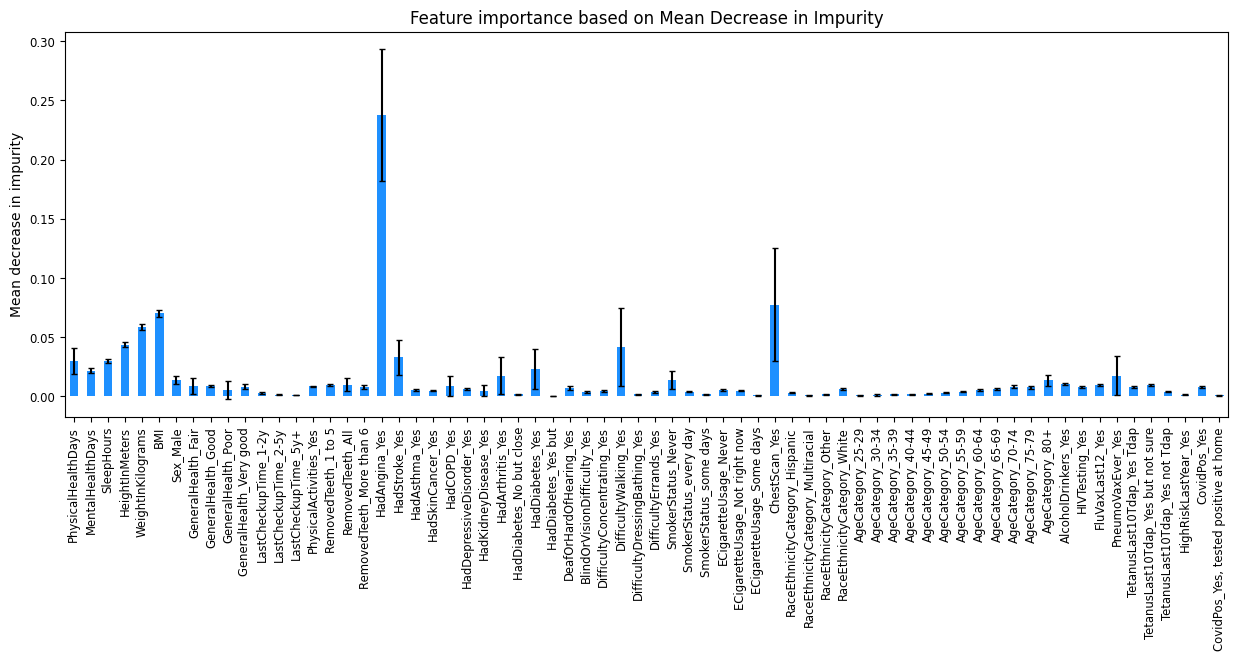

In [42]:
# plot features' importance
fig, ax = plt.subplots(figsize=(15, 5))
feature_importances.plot.bar(yerr=feature_importances_std, ax=ax,
                             fontsize='small', color="dodgerblue",
                             ecolor="black", capsize=2)
ax.set_title("Feature importance based on Mean Decrease in Impurity")
ax.set_ylabel("Mean decrease in impurity")

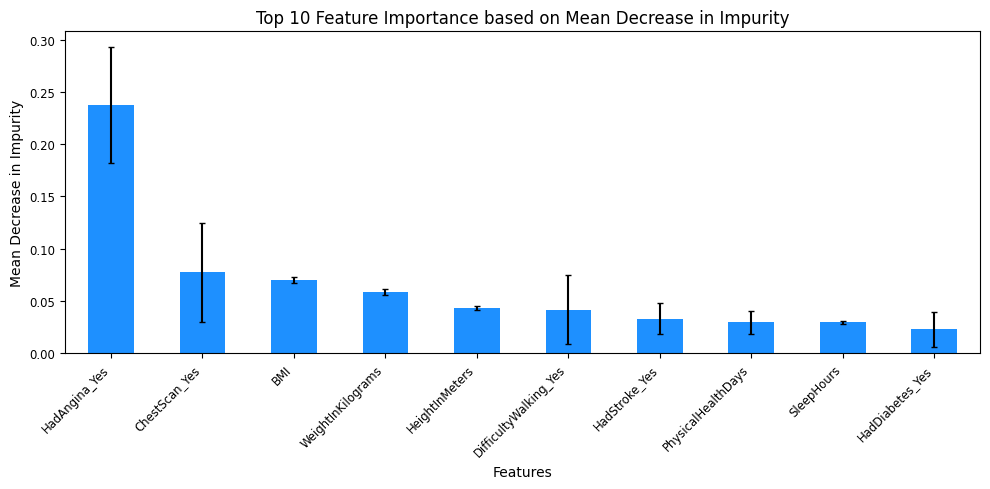

In [ ]:
# select the top 10 features with the highest importance
feature_importances_10 = feature_importances.sort_values(ascending=False).head(10)
top_features_indices = [feature_importances.index.get_loc(feature) for feature in feature_importances_10.index]
feature_importances_std_10 = feature_importances_std[top_features_indices]

# plot the top 10 features
fig, ax = plt.subplots(figsize=(10, 5))
feature_importances_10.plot.bar(yerr=feature_importances_std_10, ax=ax,
                                fontsize='small', color="dodgerblue",
                                ecolor="black", capsize=2)
ax.set_title("Top 10 Feature Importance based on Mean Decrease in Impurity")
ax.set_ylabel("Mean Decrease in Impurity")
ax.set_xlabel("Features")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()

In [44]:
# feature importance based on "feature permutation"
from sklearn.inspection import permutation_importance
result = permutation_importance(rf_best, Xtrain.iloc[validation_indices, :], ytrain.iloc[validation_indices],
                                n_repeats=5, random_state=42, n_jobs=-1)

forest_importances = pd.Series(result.importances_mean, index=Xtrain.columns)
print(forest_importances.sort_values(ascending=False, inplace=False))

HadAngina_Yes         0.034415
Sex_Male              0.000493
GeneralHealth_Fair    0.000317
HadArthritis_Yes      0.000294
FluVaxLast12_Yes      0.000244
                        ...   
AgeCategory_30-34    -0.000131
HeightInMeters       -0.000163
HadStroke_Yes        -0.000253
WeightInKilograms    -0.000267
ChestScan_Yes        -0.000366
Length: 68, dtype: float64


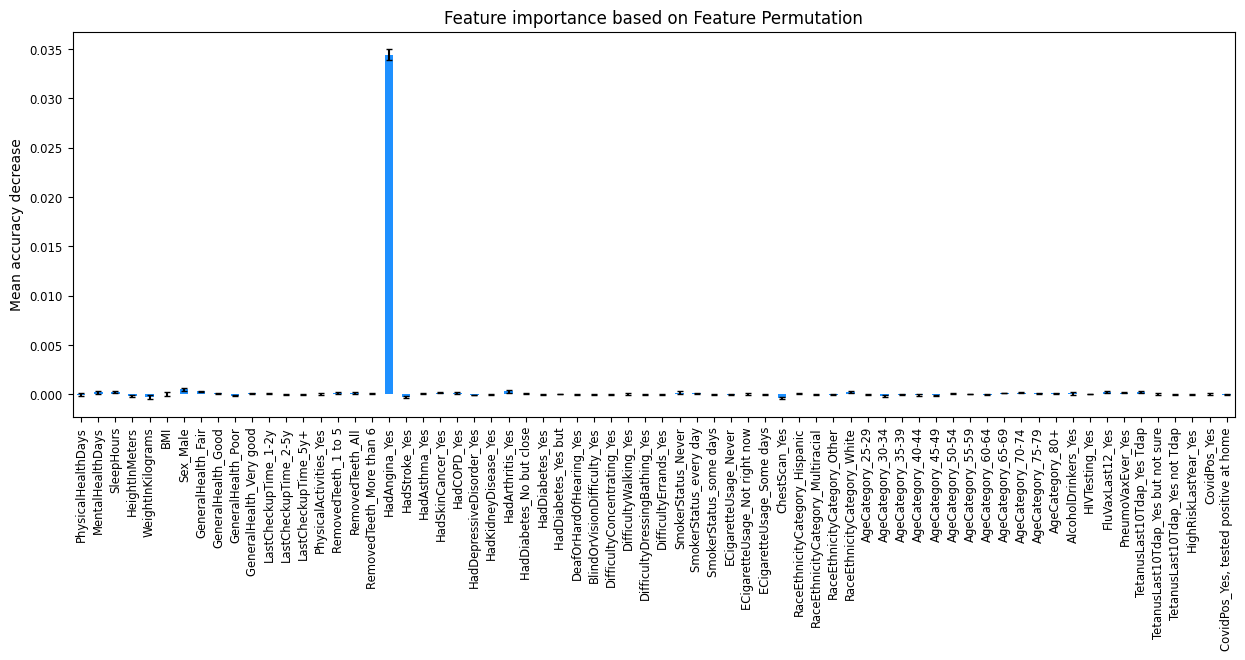

In [45]:
# make a plot
fig, ax = plt.subplots(figsize=(15, 5))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax, 
                            fontsize="small", color='dodgerblue',
                            ecolor='black', capsize=2)
ax.set_title("Feature importance based on Feature Permutation")
ax.set_ylabel("Mean accuracy decrease")
plt.show()

##### 4 model selection / evaluation on the validation set

In [46]:
# classification report: accu, precision, recall, f1
y_pred = rf_best.predict(Xtrain.iloc[validation_indices, :])
print(classification_report(ytrain.iloc[validation_indices], y_pred, digits=4))

              precision    recall  f1-score   support

       False     0.9691    0.9690    0.9691     41694
        True     0.4867    0.4871    0.4869      2513

    accuracy                         0.9416     44207
   macro avg     0.7279    0.7281    0.7280     44207
weighted avg     0.9417    0.9416    0.9416     44207



ROC-AUC Score: 0.8811


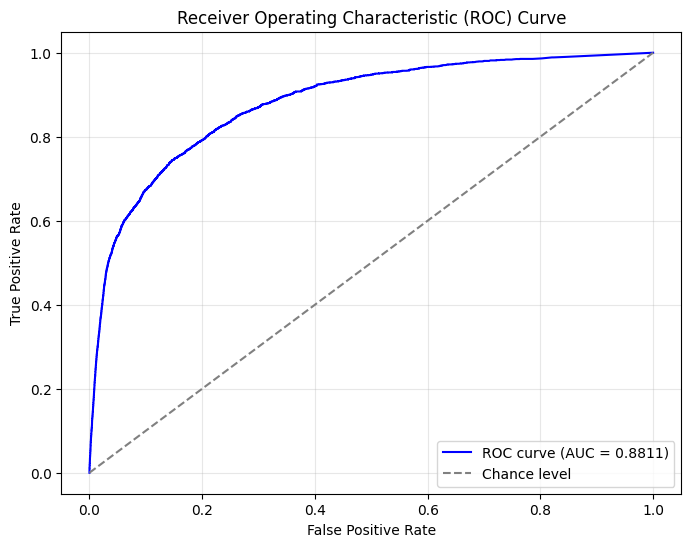

In [47]:
# roc curve, roc-auc score
y_pred_prob = rf_best.predict_proba(Xtrain.iloc[validation_indices, :])[:, 1]
fpr, tpr, thresholds = roc_curve(ytrain.iloc[validation_indices], y_pred_prob)

roc_auc = roc_auc_score(ytrain.iloc[validation_indices], y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Chance level')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

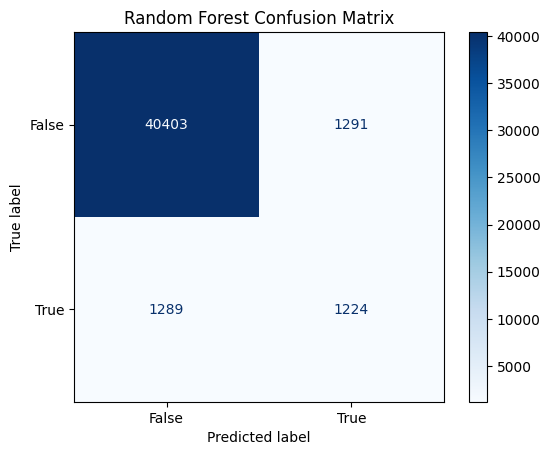

In [54]:
# confusion matrix
conf_matrix = confusion_matrix(ytrain.iloc[validation_indices], 
                               y_pred, labels=rf_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=rf_best.classes_)
disp.plot(cmap='Blues', values_format='')
plt.title('Random Forest Confusion Matrix')
plt.show()